# Homework # 3 - K-Nearest Neighbor
Data file: social_network_ads.csv

### Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Load data

In [2]:
# Read CSV into dataframe
social_network_df = pd.read_csv("social_network_ads.csv")

In [3]:
# Display first few rows
social_network_df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### Drop unnecessary columns 'User ID' and 'Gender'

In [4]:
social_network_df.drop(["User ID", "Gender"], axis=1, inplace=True)

### Explore data

In [5]:
# Display distribution (min, max) of values for Age and EstimatedSalary variables
social_network_df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

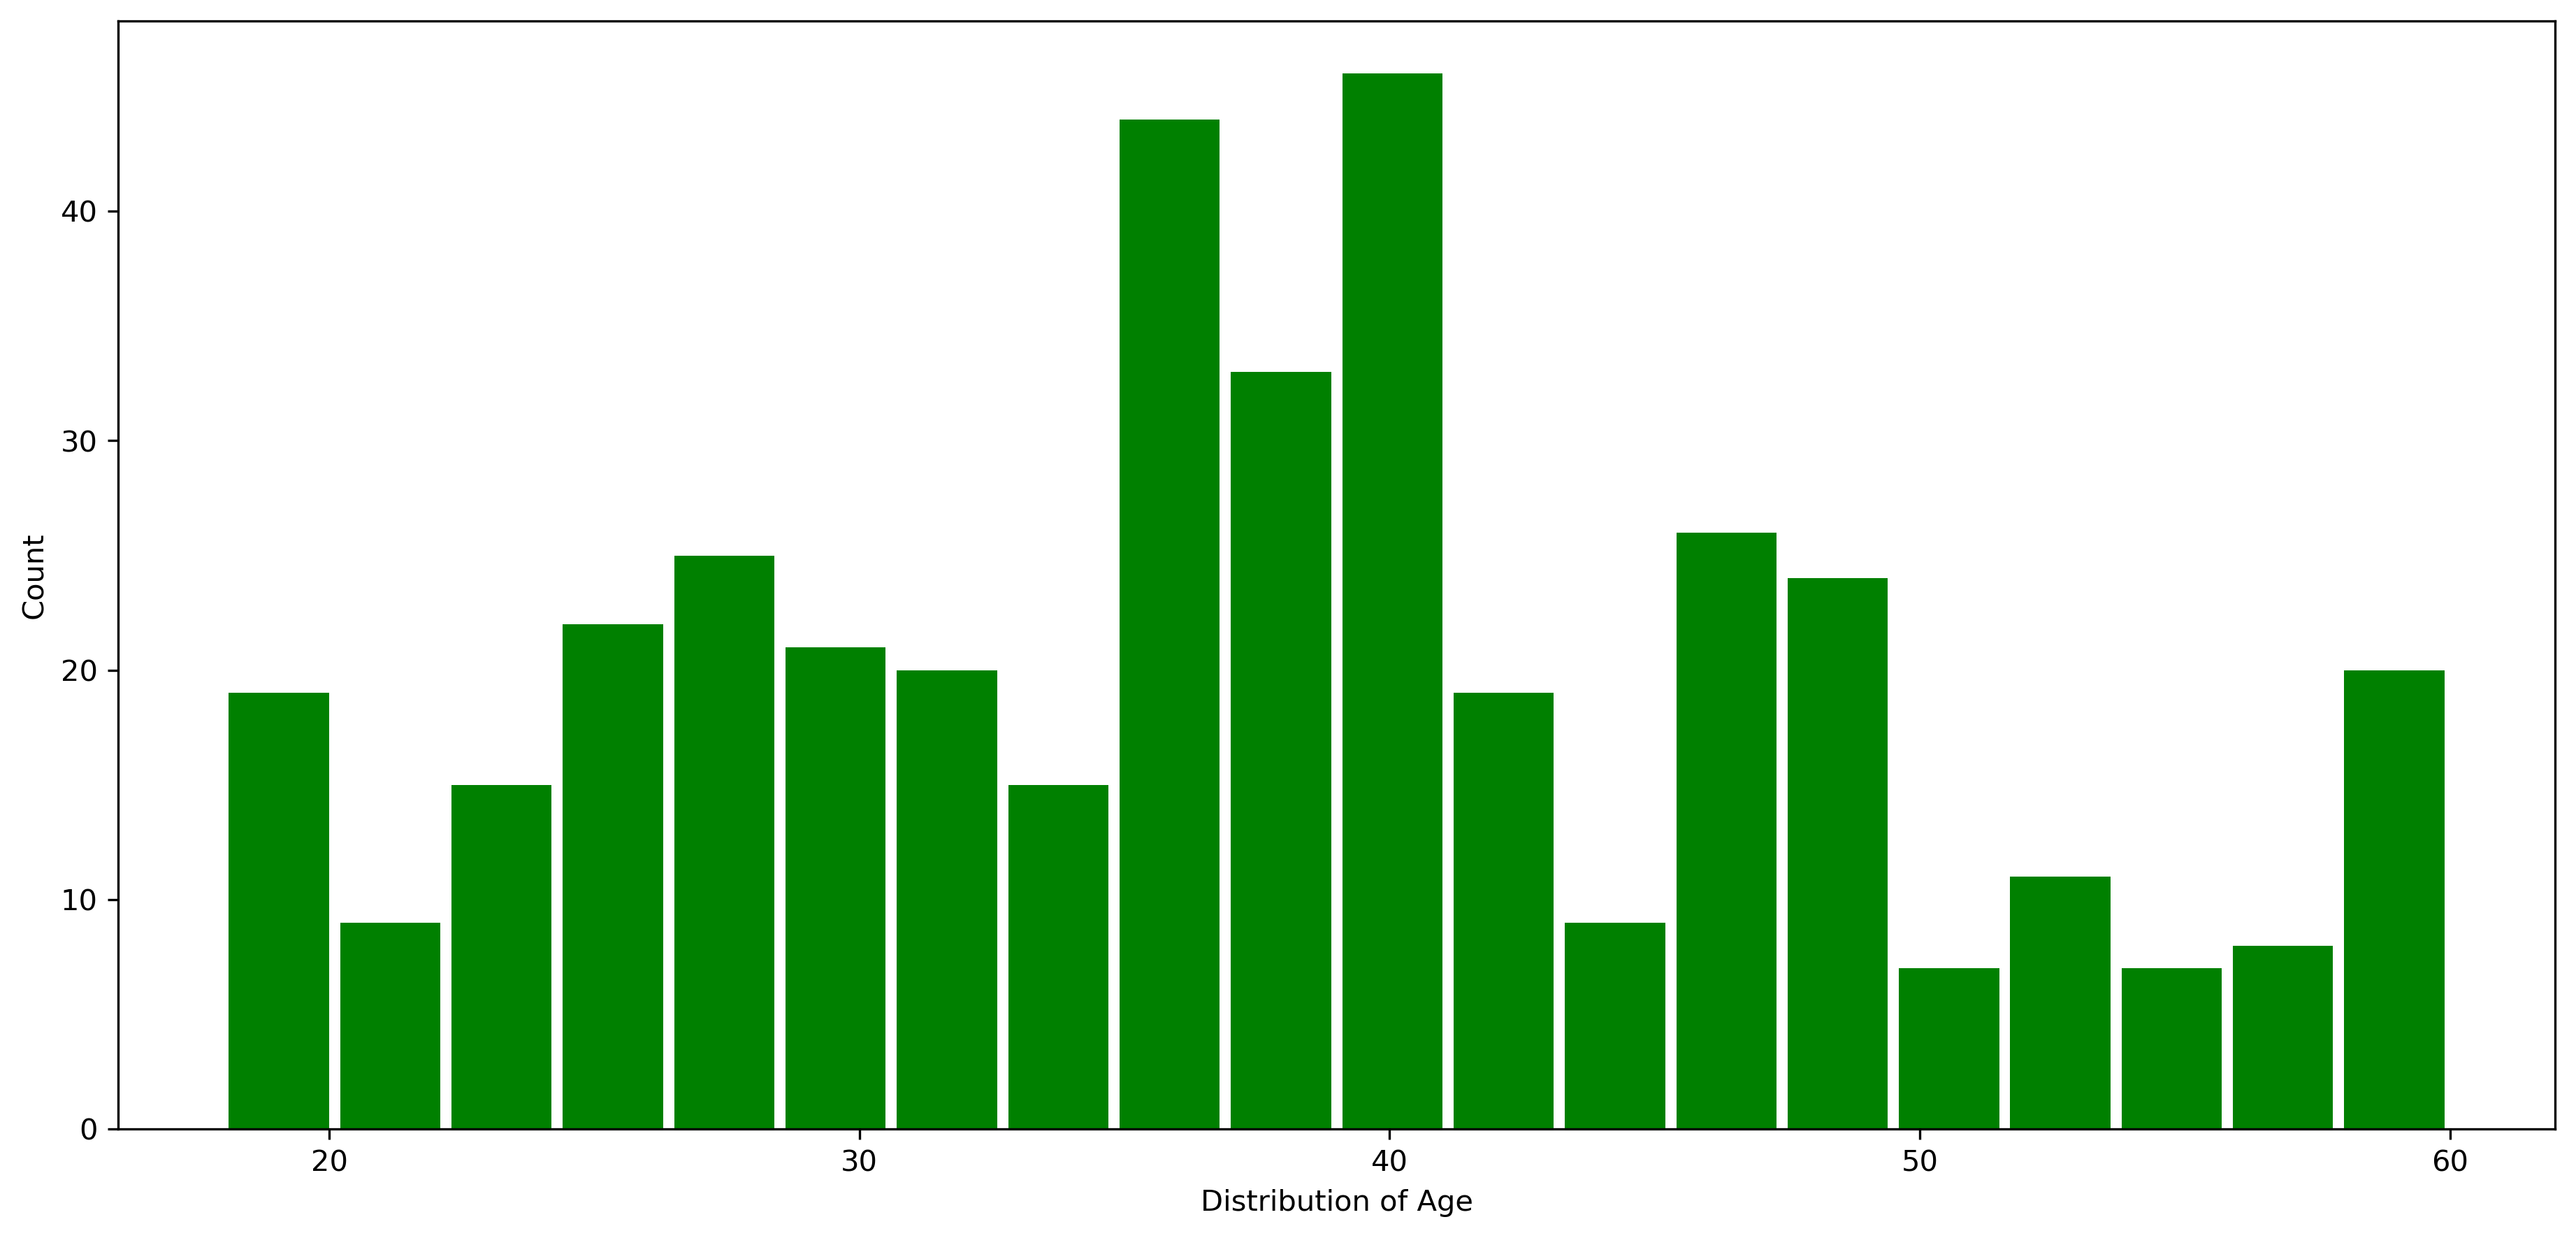

In [6]:
# Display distribution (min, max) of scaled values for Age and EstimatedSalary variables
plt.figure(figsize=(15,7), dpi=300)
plt.xlabel('Distribution of Age')
plt.ylabel('Count')
plt.hist(social_network_df['Age'], bins=20, color='green', rwidth=0.9)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

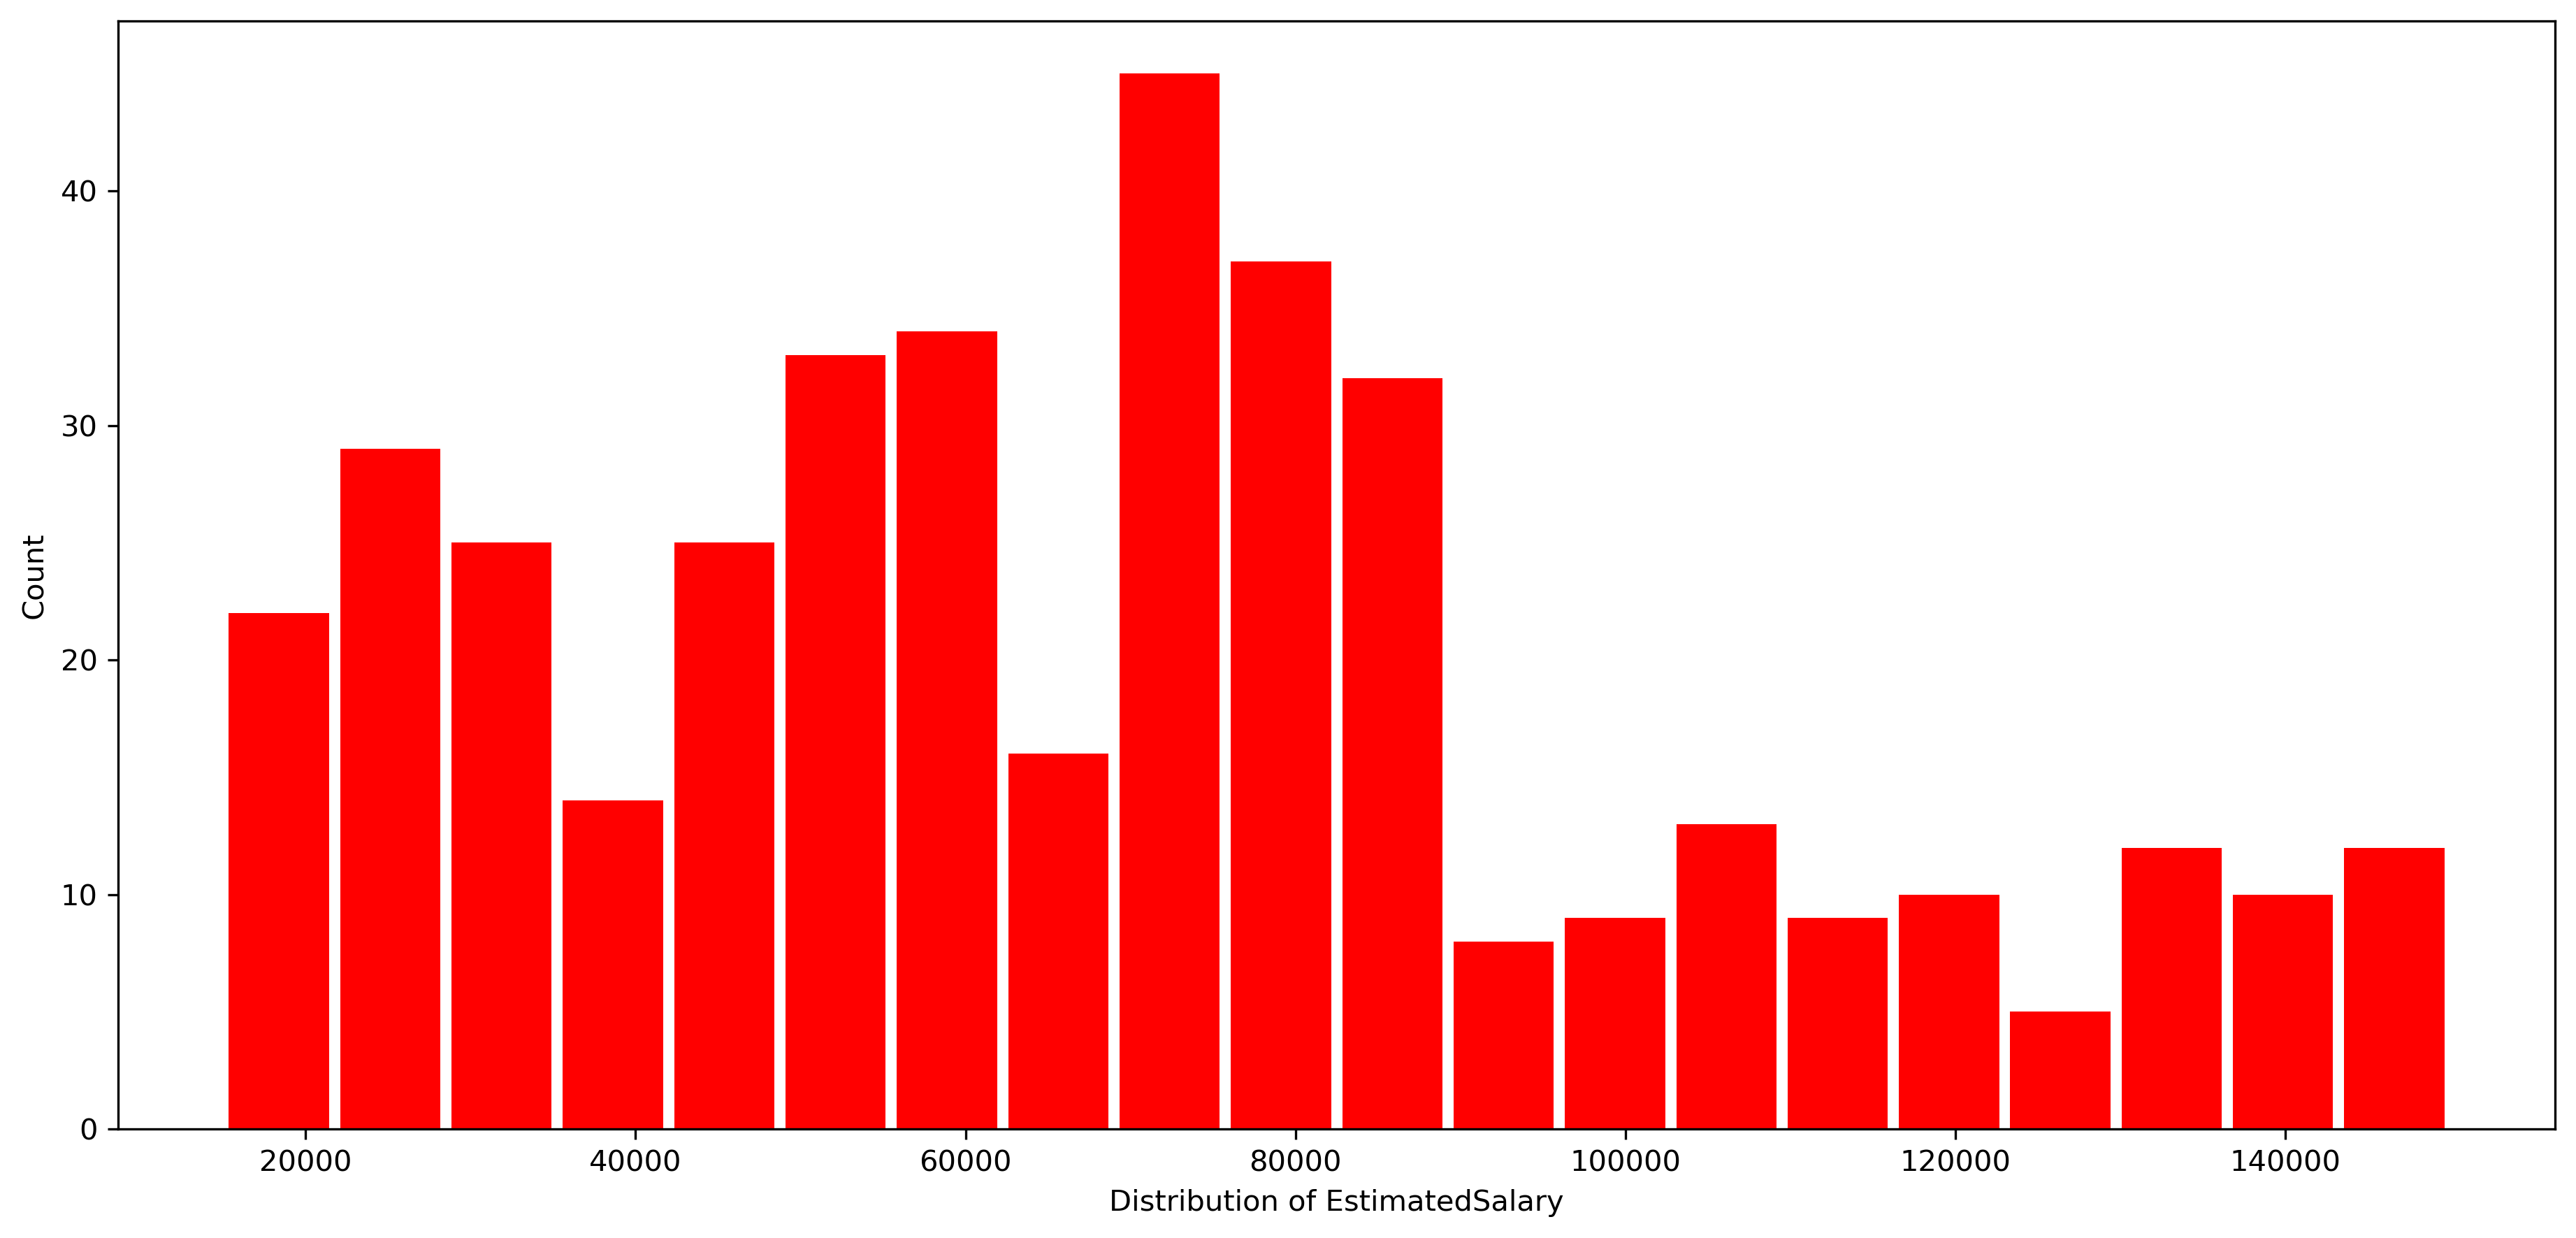

In [7]:
# Display distribution (min, max) of scaled values for Age and EstimatedSalary variables
plt.figure(figsize=(15,7), dpi=300)
plt.xlabel('Distribution of EstimatedSalary')
plt.ylabel('Count')
plt.hist(social_network_df['EstimatedSalary'], bins=20, color='red', rwidth=0.9)
plt.show

#### Note the scale for column EstimatedSalary is much higher than for column Age

### Separate independent and dependent variables
* Independent variables: All except Purchased
* Dependent variable: Purchased

In [8]:
# Prepare data for training and testing
X = social_network_df.drop("Purchased", axis = 1)           # feature values - all columns except last one
y = social_network_df[["Purchased"]]

### Split data into training and test sets

In [9]:
# Split into training (70%) and test data (30%)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scale Age and EstimatedSalary variables

In [10]:
# Use StandardScaler
scaler = StandardScaler()
social_network_df['Age']=scaler.fit_transform(social_network_df[['Age']])
social_network_df['EstimatedSalary']=scaler.fit_transform(social_network_df[['EstimatedSalary']])

<function matplotlib.pyplot.show(close=None, block=None)>

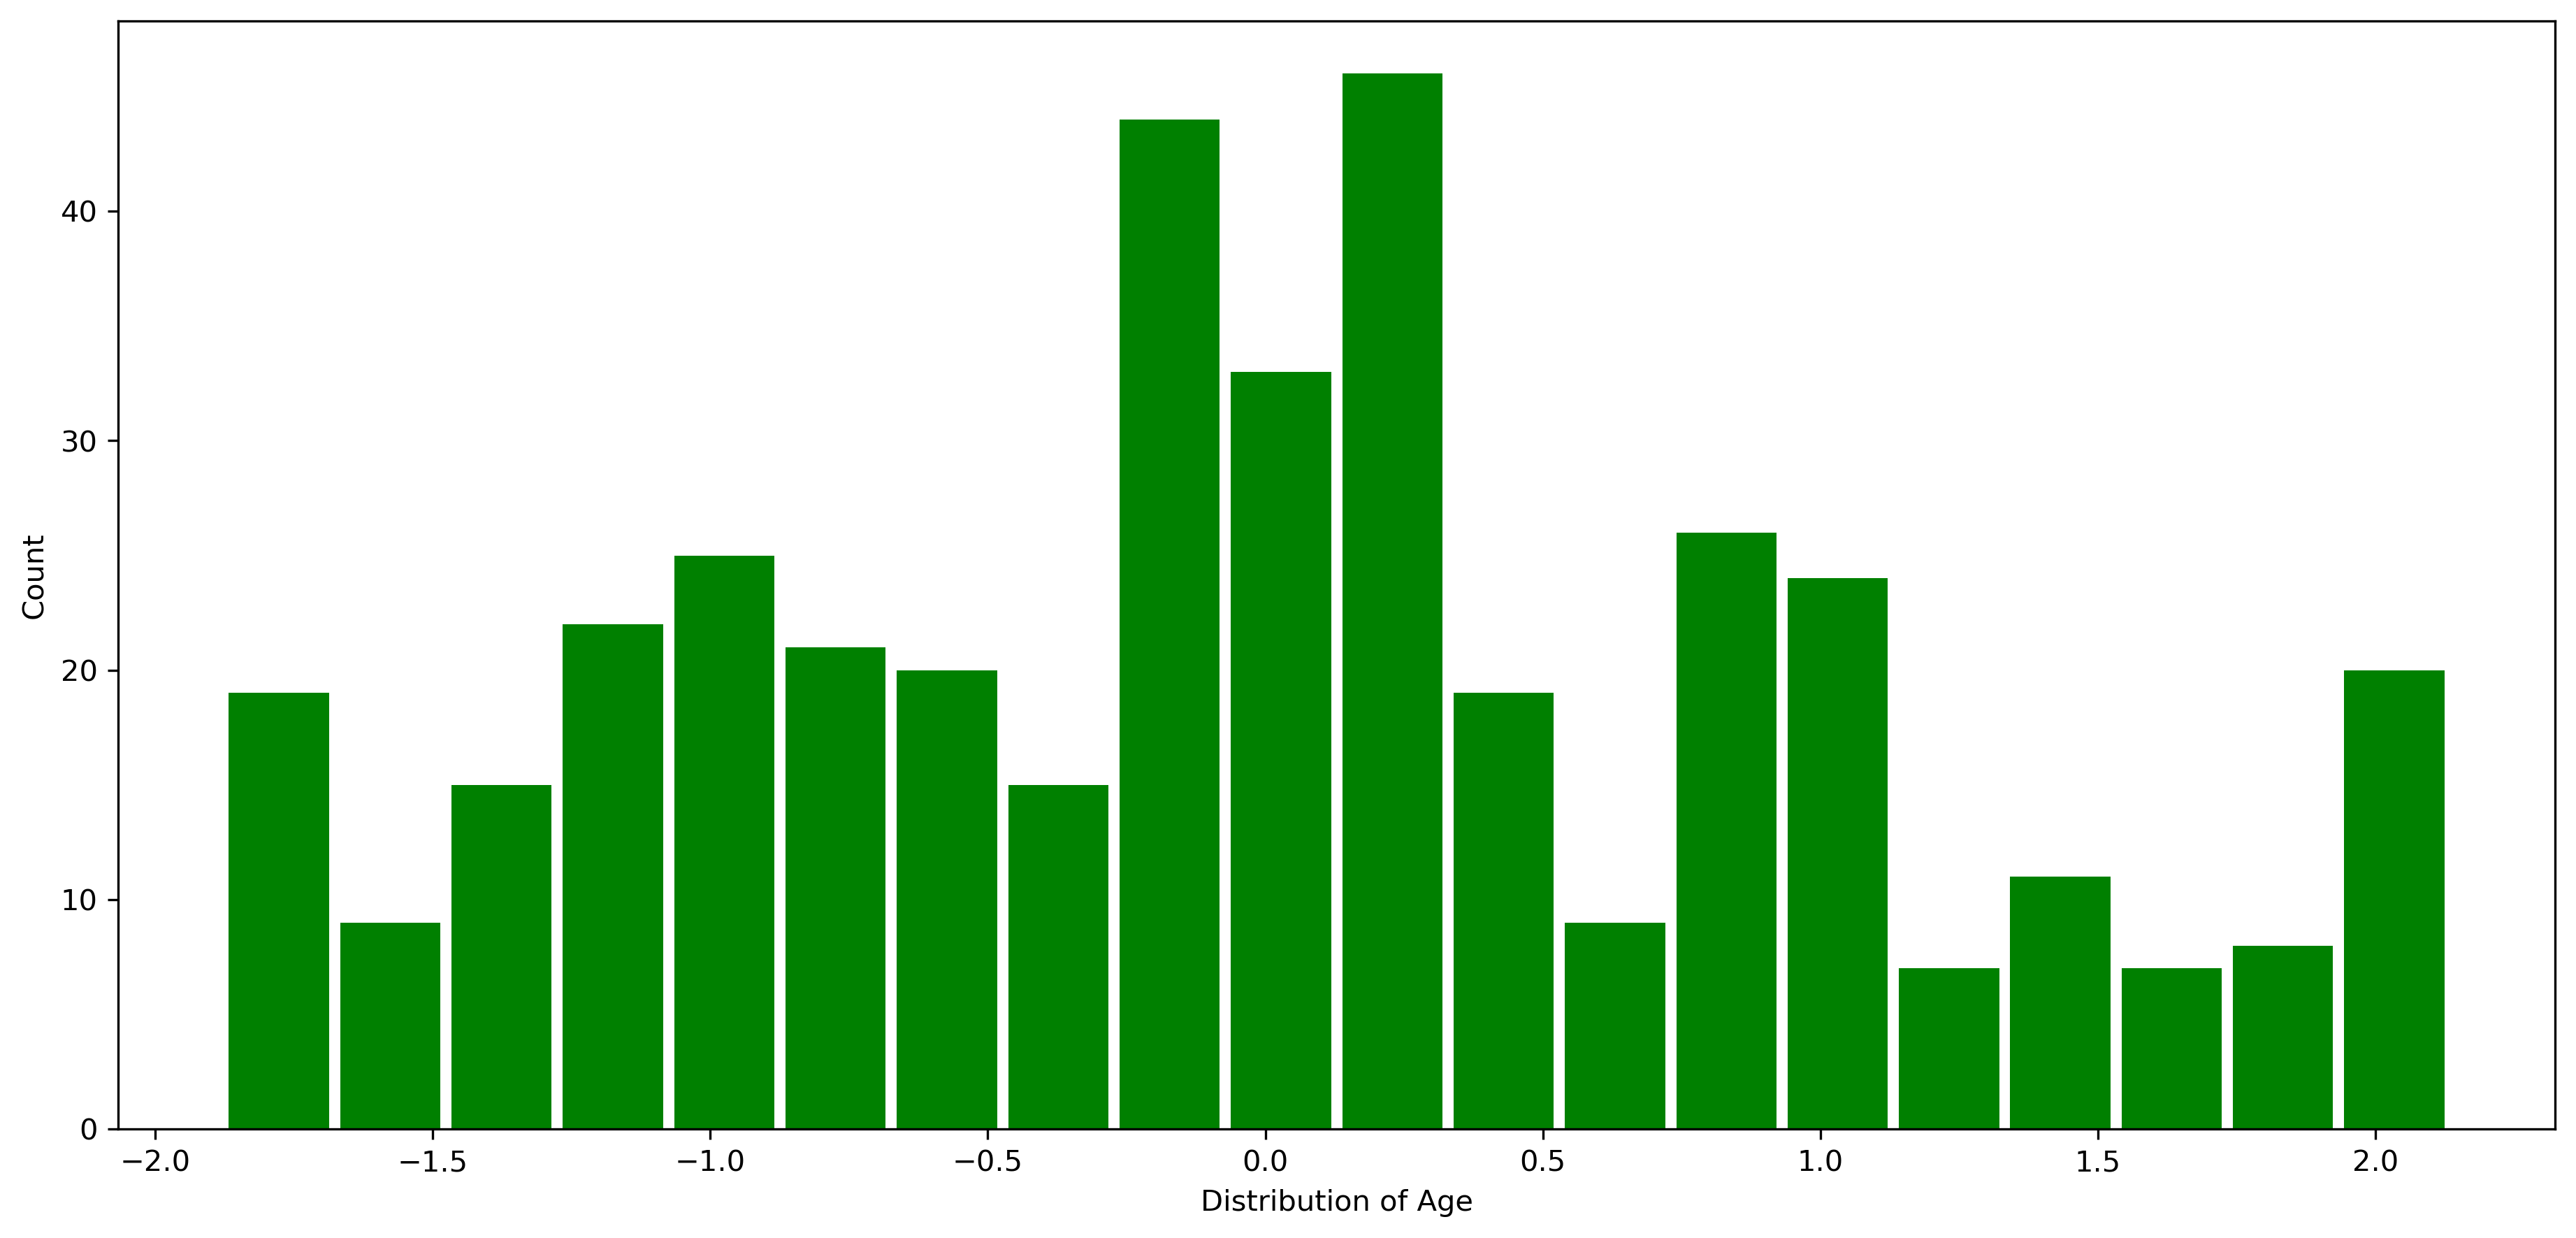

In [11]:
# Display distribution (min, max) of scaled values for Age and EstimatedSalary variables
plt.figure(figsize=(15,7), dpi=300)
plt.xlabel('Distribution of Age')
plt.ylabel('Count')
plt.hist(social_network_df['Age'], bins=20, color='green', rwidth=0.9)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

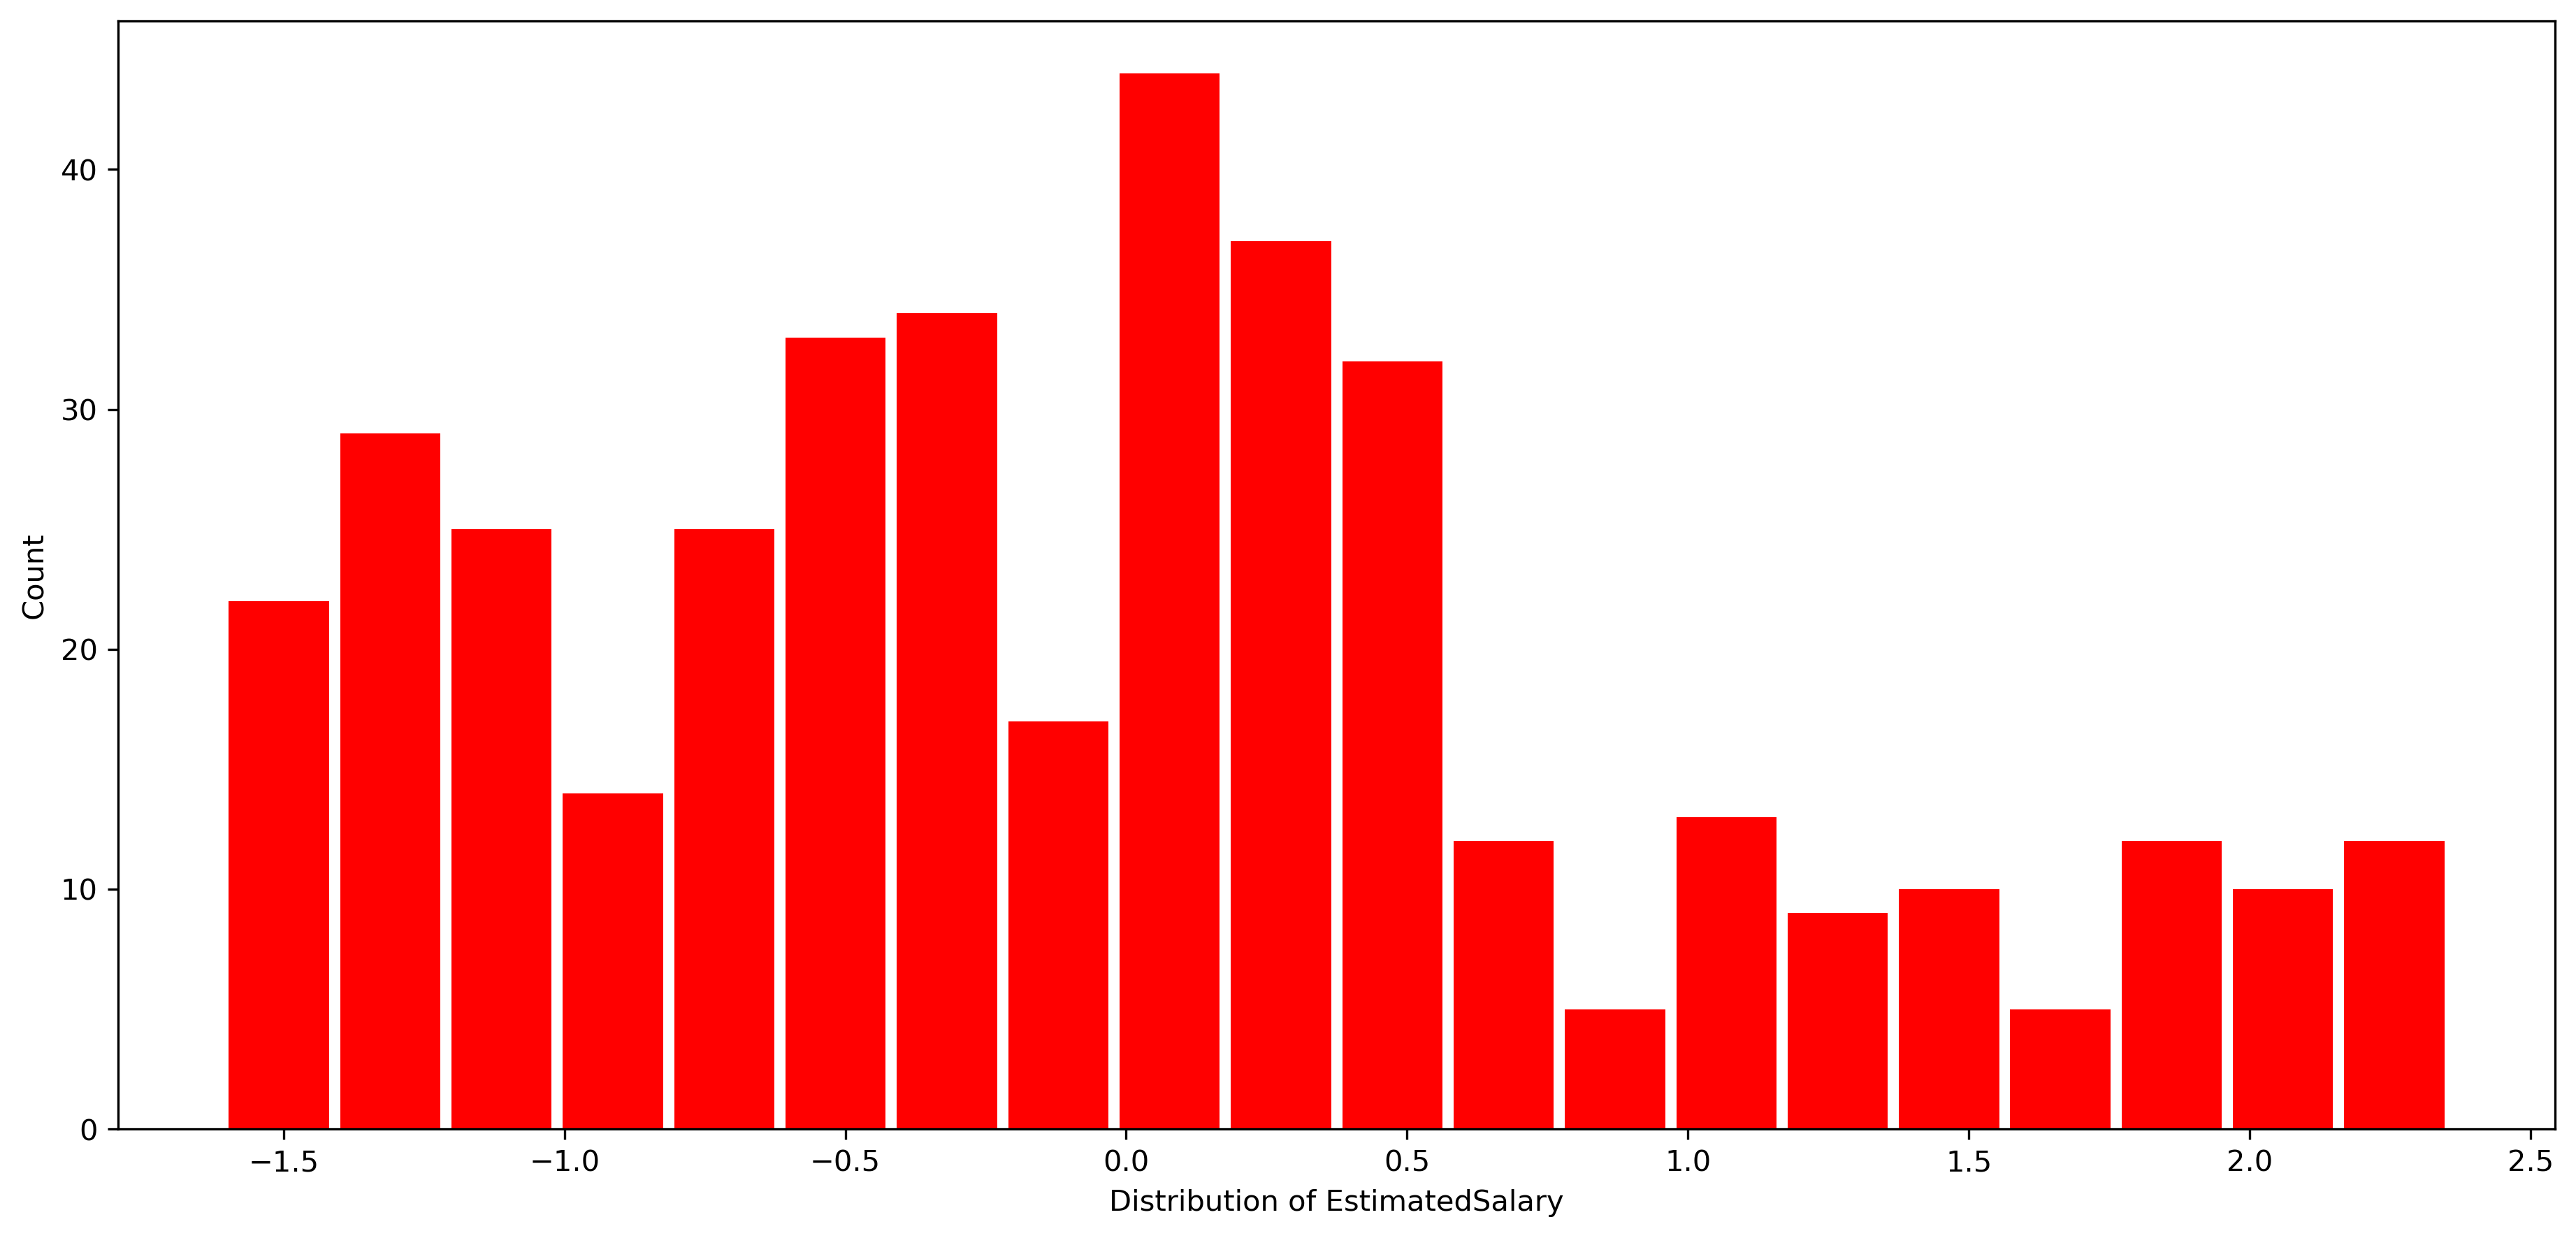

In [12]:
# Display distribution (min, max) of scaled values for Age and EstimatedSalary variables
plt.figure(figsize=(15,7), dpi=300)
plt.xlabel('Distribution of EstimatedSalary')
plt.ylabel('Count')
plt.hist(social_network_df['EstimatedSalary'], bins=20, color='red', rwidth=0.9)
plt.show

### Train KNeighborsClassifier (with default hyperparameters)

In [13]:
# Defaults: n_neighbors=5, weights='uniform' metric='Euclidean'
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean")
knn.fit(x_train, y_train)

C:\Users\onyek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

### Evaulate model performance

In [14]:
# Predict using the Test set results
y_pred=knn.predict(x_test)

In [15]:
# Display the Confusion Matrix
cf = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None, normalize=None)
print(cf)

[[69  4]
 [18 29]]


In [16]:
# Generate and print model performance metrics (accuracy) on test set
print("Accuracy of test set =", round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy of test set = 81.67 %


In [17]:
# Generate classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        73
           1       0.88      0.62      0.73        47

    accuracy                           0.82       120
   macro avg       0.84      0.78      0.79       120
weighted avg       0.83      0.82      0.81       120



### Train KNeighborsClassifier (change hyperparameter: n_neighbors)

In [18]:
# Defaults: n_neighbors=5, weights='uniform' metric='Euclidean'
knn2 = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric="euclidean")
knn2.fit(x_train, y_train)

C:\Users\onyek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

### Evaulate model performance

In [19]:
# Predict using the Test set results
y_pred2=knn2.predict(x_test)

In [20]:
# Display the Confusion Matrix
cf2 = confusion_matrix(y_test, y_pred2, labels=None, sample_weight=None, normalize=None)
print(cf2)

[[65  8]
 [17 30]]


In [21]:
# Generate and print model performance metrics (accuracy) on test set
print("Accuracy of test set =", round(accuracy_score(y_test, y_pred2)*100, 2), '%')

Accuracy of test set = 79.17 %


In [22]:
# Generate classification report to evaluate the model
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        73
           1       0.79      0.64      0.71        47

    accuracy                           0.79       120
   macro avg       0.79      0.76      0.77       120
weighted avg       0.79      0.79      0.79       120

